Introduction: The purpose of this Data Analysis was to determine whether or not there is a relationship between the amount of followers an ICO has across three main Social media platforms, namely Reddit, Facebook, and Twitter, and how succesful an ICO is. I defined an ICO's success in the simplest way possible, which is nothing more than how much money an ICO raised across its lifetime. Another option I had of defining what success was with regards to an ICO was how much of its goal it reached (i.e if the goal was 10,000,000 dollars, how much of 10,000,000 dollars was the ICO able to raise), but such a definition failed to take into account that ICOs all have their own arbitrarly set goal; in other words, reaching 100% of 4 million would be greater than reaching 25% of 100 million. 

ICOs are scraped once a day from ICODrops.com and the number of followers are taken from the ICO social media websites directly

Importing necessary libraries

In [1]:
%matplotlib notebook

import numpy
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as ss

Placing data into arrays and getting preliminary statistics

In [9]:
ICOData = open("ICOData_DONOT.txt", "r")

unfinished_followers = [[], [], []] # 0: List of Facebook followers for ICOs that have facebook, 1: Reddit, 2: Twitter for ICOs
# that have not reached 100% of their goal 

goal_to_reach_unfinished = [[], [], []] # 0: List of money raised for ICOs that have facebook, 1: Reddit, 2: Twitter for ICOs
# that have not reached 100% of their goal

ICO_names = [[], [], []] # 0: ICO names that have facebook, 1: Reddit, 2: Twitter for ICOs that have not reached 100% of their 
# goal

RandT = [[], [], []]
RandT_raised = []
# 0: List of 1's necessary for Gradient Descent
# 1: Number of Twitter followers for ICOs that have both Reddit and Twitter followers
# 2: Number of Reddit Followers for ICOs that have both Reddit and Twitter followers
# 3: Funds raised from ICOs that have both Twitter and Reddit

total_followers = [[], [], []] # 0: List of Facebook followers for ICOs that have facebook, 1: Reddit, 2: Twitter
total_money = [[], [], []] # 0: List of money raised for ICOs that have facebook, 1: Reddit, 2: Twitter

number_of_sm = [0, 0, 0] # 0: Number of ICOs with facebook, 1: Number of ICOs with reddit, 2: Number of ICOs with twitter

finishedr = [[], [], []] # 0: List of followers, 1: List of amount of money raised, 2: Name of ICO (for reddit)
finishedt = [[], [], []] # Same structure as above but for twitter
finishedf = [[], [], []] # Same structure as above but for facebook

for line_initial in ICOData:
    rl = line_initial.split(",")
    if int(rl[1]) > 0:
        total_followers[0].append(int(rl[1]))
        total_money[0].append(int(rl[6]))
    if int(rl[2]) > 0:
        total_followers[1].append(int(rl[2]))
        total_money[1].append(int(rl[6]))
    if int(rl[3]) > 0:
        total_followers[2].append(int(rl[3]))
        total_money[2].append(int(rl[6]))

# Getting quartiles of number of followers for each Social Media group in order to remove outliers
# 0: 1st quartile for followers, 1: 3rd quartile for followers, 2: 1st quartile for money raised of Social Media platform
# 3: 3rd quartile for money raised of Social Media Platform
reddit_quartile = [numpy.percentile(total_followers[1], 25), numpy.percentile(total_followers[1], 75),
                   numpy.percentile(total_money[1], 25), numpy.percentile(total_money[1], 75), 
                   numpy.percentile(total_followers[1], 50)]
facebook_quartile = [numpy.percentile(total_followers[0], 25), numpy.percentile(total_followers[0], 75),
                     numpy.percentile(total_money[0], 25), numpy.percentile(total_money[0], 75),
                     numpy.percentile(total_followers[0], 50)]
twitter_quartile = [numpy.percentile(total_followers[2], 25), numpy.percentile(total_followers[2], 75),
                    numpy.percentile(total_money[2], 25), numpy.percentile(total_money[2], 75),
                     numpy.percentile(total_followers[2], 50)]

min_num = [sys.maxsize, sys.maxsize, sys.maxsize]
# ICOs with smallest number of Facebook, Reddit, and Twitter followers, Respectively

min_names = ["", "", ""]
# Names of the ICOs with the smallest number of Facebook, Reddit, and Twitter followers, Respectively

max_num = [-sys.maxsize - 1, -sys.maxsize - 1, -sys.maxsize - 1]
# # ICOs with greatest number of Facebook, Reddit, and Twitter followers, Respectively

max_names = ["", "", ""]
# Names of the ICOs with the greatest number of Facebook, Reddit, and Twitter followers, Respectively

# Resetting variables
total_followers = [[], [], []]
total_money = [[], [], []]

ICOData.seek(0)
for line in ICOData:

    rl = line.split(",")
    if (twitter_quartile[1] + 1.5 * (twitter_quartile[1] - twitter_quartile[0]) > int(rl[3]) > 0 and
            0 < int(rl[6]) < twitter_quartile[3] + (twitter_quartile[3] - twitter_quartile[2]) * 1.5): #Remove Outliers
        if rl[5] != " N/A" and int(rl[5]) < 100: # Split into two sections, one for those that have reached 100% of their goal
                                                 # and those that have not for twitter
            unfinished_followers[2].append(int(rl[3]))
            goal_to_reach_unfinished[2].append(int(rl[6]))
            ICO_names[2].append(rl[0])
        else:
            finishedt[0].append(int(rl[3]))
            finishedt[1].append(int(rl[6]))
            finishedt[2].append(rl[0])
        total_followers[2].append(int(rl[3]))
        total_money[2].append(int(rl[6]))

    if (reddit_quartile[1] + 1.5 * (reddit_quartile[1] - reddit_quartile[0]) > int(rl[2]) > 0 and
            reddit_quartile[3] + (reddit_quartile[3] - reddit_quartile[2]) * 1.5): # Doing the same for Reddit
        if rl[5] != " N/A" and int(rl[5]) < 100:
            unfinished_followers[1].append(int(rl[2]))
            goal_to_reach_unfinished[1].append(int(rl[6]))
            ICO_names[1].append(rl[0])
        else:
            finishedr[0].append(int(rl[2]))
            finishedr[1].append(int(rl[6]))
            finishedr[2].append(rl[0])
        total_followers[1].append(int(rl[2]))
        total_money[1].append(int(rl[6]))

    if (facebook_quartile[1] + 1.5 * (facebook_quartile[1] - facebook_quartile[0]) > int(rl[1]) > 0 and
            0 < int(rl[6]) < facebook_quartile[3] + (facebook_quartile[3] - facebook_quartile[2]) * 1.5):
        if rl[5] != " N/A" and int(rl[5]) < 100: # Doing the same for facebook
            unfinished_followers[0].append(int(rl[1]))
            goal_to_reach_unfinished[0].append(int(rl[6]))
            ICO_names[0].append(rl[0])
        else:
            finishedf[0].append(int(rl[1]))
            finishedf[1].append(int(rl[6]))
            finishedf[2].append(rl[0])
        total_followers[0].append(int(rl[1]))
        total_money[0].append(int(rl[6]))
    
    #Inserting Data into the array that will model the relationship between ICOs with reddit and twitter followers
    if (twitter_quartile[1] + 1.5 * (twitter_quartile[1] - twitter_quartile[0]) > int(rl[3]) > 0 and
            0 < int(rl[6]) < 25420000 + 21201990 * 1.5 and
            reddit_quartile[1] + 1.5 * (reddit_quartile[1] - reddit_quartile[0]) > int(rl[2]) > 0):
        RandT[0].append(1)
        RandT[1].append(int(rl[2]))
        RandT[2].append(int(rl[3]))
        RandT_raised.append(int(rl[6]))

    # Find maximum and minimum facebook followers
    if 0 < int(rl[1]) < min_num[0]:
        min_num[0] = int(rl[1])
        min_names[0] = rl[0]
    if int(rl[1]) > max_num[0]:
        max_num[0] = int(rl[1])
        max_names[0] = rl[0]
    
    # Find maximum and minimum reddit followers
    if 0 < int(rl[2]) < min_num[1]:
        min_num[1] = int(rl[2])
        min_names[1] = rl[0]
    if int(rl[2]) > max_num[1]:
        max_num[1] = int(rl[2])
        max_names[1] = rl[0]
    
    # Find maximum and minimum twitter followers
    if 0 < int(rl[3]) < min_num[2]:
        min_num[2] = int(rl[3])
        min_names[2] = rl[0]
    if int(rl[3]) > max_num[2]:
        max_num[2] = int(rl[3])
        max_names[2] = rl[0]

    # Add up all ICOs that have these Social Mediat Platforms
    if int(rl[1]) > 0:
        number_of_sm[0] += 1
    if int(rl[2]) > 0:
        number_of_sm[1] += 1
    if int(rl[3]) > 0:
        number_of_sm[2] += 1

print("ICO with greatest number of Facebook Users: " + max_names[0] + ", "
      + str(max_num[0]) + "\n" + "ICO with minimum number of Facebook Users: " + min_names[0] + ", "
      + str(min_num[0]) + "\n" + "ICO with greatest number of Reddit Users: " + max_names[1] + ", "
      + str(max_num[1]) + "\n" + "ICO with minimum number of Reddit Users: " + min_names[1] + ", "
      + str(min_num[1]) + "\n" + "ICO with greatest number of Twitter Users: " + max_names[2] + ", "
      + str(max_num[2]) + "\n" + "ICO with minimum number of Twitter Users: " + min_names[2] + ", "
      + str(min_num[2]) + "\n")

print("ICOs with Facebook: " + str(number_of_sm[0]) + "\n"
      + "ICOs with Reddit: " + str(number_of_sm[1]) + "\n"
      + "ICOs with Twitter: " + str(number_of_sm[2]))

ICO with greatest number of Facebook Users: MicroMoney, 559007
ICO with minimum number of Facebook Users: Aion Pre-sale, 283
ICO with greatest number of Reddit Users: TenX, 9026
ICO with minimum number of Reddit Users: trade.io Pre-sale, 1
ICO with greatest number of Twitter Users: MicroMoney, 170498
ICO with minimum number of Twitter Users: Presearch, 3

ICOs with Facebook: 124
ICOs with Reddit: 78
ICOs with Twitter: 170


Below is the boxplot illustrating the Data distribution of each of the Social Media platforms

<IPython.core.display.Javascript object>


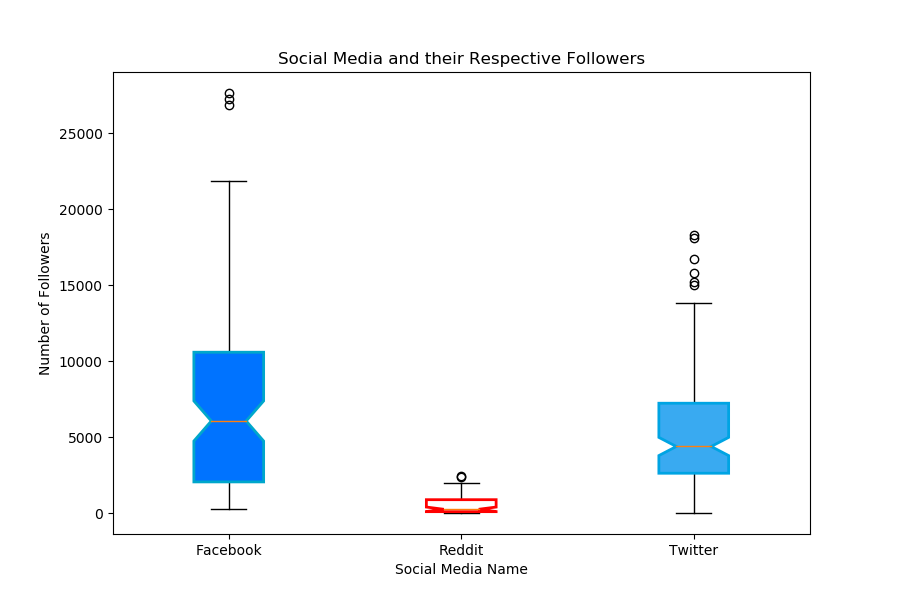

Facebook first quartile: 2228.5, Facebook Median: 6378.0, Facebook third quartile: 13100.0
Reddit first quartile: 111.0, Reddit Median: 263.0, Reddit third quartile: 1033.0
Twitter first quartile: 2887.0, Twitter Median: 4981.0, Twitter third quartile: 9344.0



In [3]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(total_followers, notch=True, patch_artist=True)

bp['boxes'][0].set(color='#00a7cb', linewidth=2)
bp['boxes'][0].set(facecolor='#0073ff')
bp['boxes'][1].set(color='#ff0000', linewidth=2)
bp['boxes'][1].set(facecolor='#ffffff')
bp['boxes'][2].set(color='#00a4e3', linewidth=2)
bp['boxes'][2].set(facecolor='#39aaf1')

ax.set_xticklabels(['Facebook', 'Reddit', 'Twitter'])
ax.set_xlabel('Social Media Name')
ax.set_ylabel('Number of Followers')
ax.set_title('Social Media and their Respective Followers')
plt.show()

print("Facebook first quartile: " + str(facebook_quartile[0]) + ", " + "Facebook Median: " + str(facebook_quartile[4]) + ", "
      "Facebook third quartile: " + str(facebook_quartile[1]) + "\n" + 
      "Reddit first quartile: " + str(reddit_quartile[0]) + ", " + "Reddit Median: " + str(reddit_quartile[4]) + ", "
      "Reddit third quartile: " + str(reddit_quartile[1]) + "\n" + 
      "Twitter first quartile: " + str(twitter_quartile[0]) + ", " + "Twitter Median: " + str(twitter_quartile[4]) + ", "
      "Twitter third quartile: " + str(twitter_quartile[1]) + "\n")

Stats Analysis of Facebook, Reddit, and Twitter followers vs Price

<IPython.core.display.Javascript object>


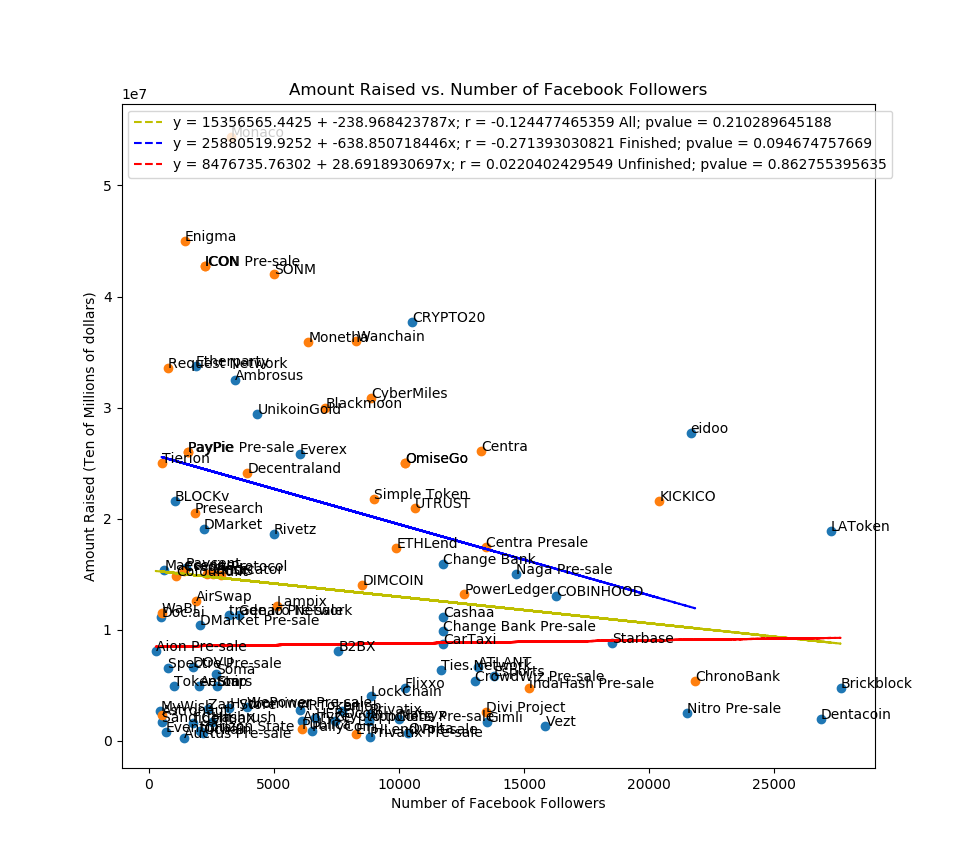

In [58]:
fig, ax = plt.subplots()
ax.scatter(unfinished_followers[0], goal_to_reach_unfinished[0])
ax.scatter(finishedf[0], finishedf[1])

fit = numpy.polyfit(total_followers[0], total_money[0], 1)
fit_func = numpy.poly1d(fit)
stats_t = ss.linregress(total_followers[0], total_money[0])
plt.plot(total_followers[0],
         fit_func(total_followers[0]),
         '--y',
         label='y = %s + %sx; r = %s' % (stats_t.intercept, stats_t.slope, stats_t.rvalue) + " All" +
               "; pvalue = " + str(stats_t.pvalue))

fit = numpy.polyfit(finishedf[0], finishedf[1], 1)
fit_func = numpy.poly1d(fit)
stats = ss.linregress(finishedf[0], finishedf[1])
plt.plot(finishedf[0],
         fit_func(finishedf[0]),
         "--b",
         label='y = %s + %sx; r = %s' % (stats.intercept, stats.slope, stats.rvalue) + " Finished" +
               "; pvalue = " + str(stats.pvalue))

fit = numpy.polyfit(unfinished_followers[0], goal_to_reach_unfinished[0], 1)
fit_func = numpy.poly1d(fit)
stats = ss.linregress(unfinished_followers[0], goal_to_reach_unfinished[0])
plt.plot(unfinished_followers[0],
         fit_func(unfinished_followers[0]),
         "--r",
         label='y = %s + %sx; r = %s' % (stats.intercept, stats.slope, stats.rvalue) + " Unfinished" +
               "; pvalue = " + str(stats.pvalue))

for i, txt in enumerate(ICO_names[0]):
    ax.annotate(txt, (unfinished_followers[0][i], goal_to_reach_unfinished[0][i]))

for i, txt in enumerate(finishedf[2]):
    ax.annotate(txt, (finishedf[0][i], finishedf[1][i]))

ax.set_xlabel("Number of Facebook Followers")
ax.set_ylabel("Amount Raised (Ten of Millions of dollars)")
ax.set_title("Amount Raised vs. Number of Facebook Followers")
plt.legend(loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


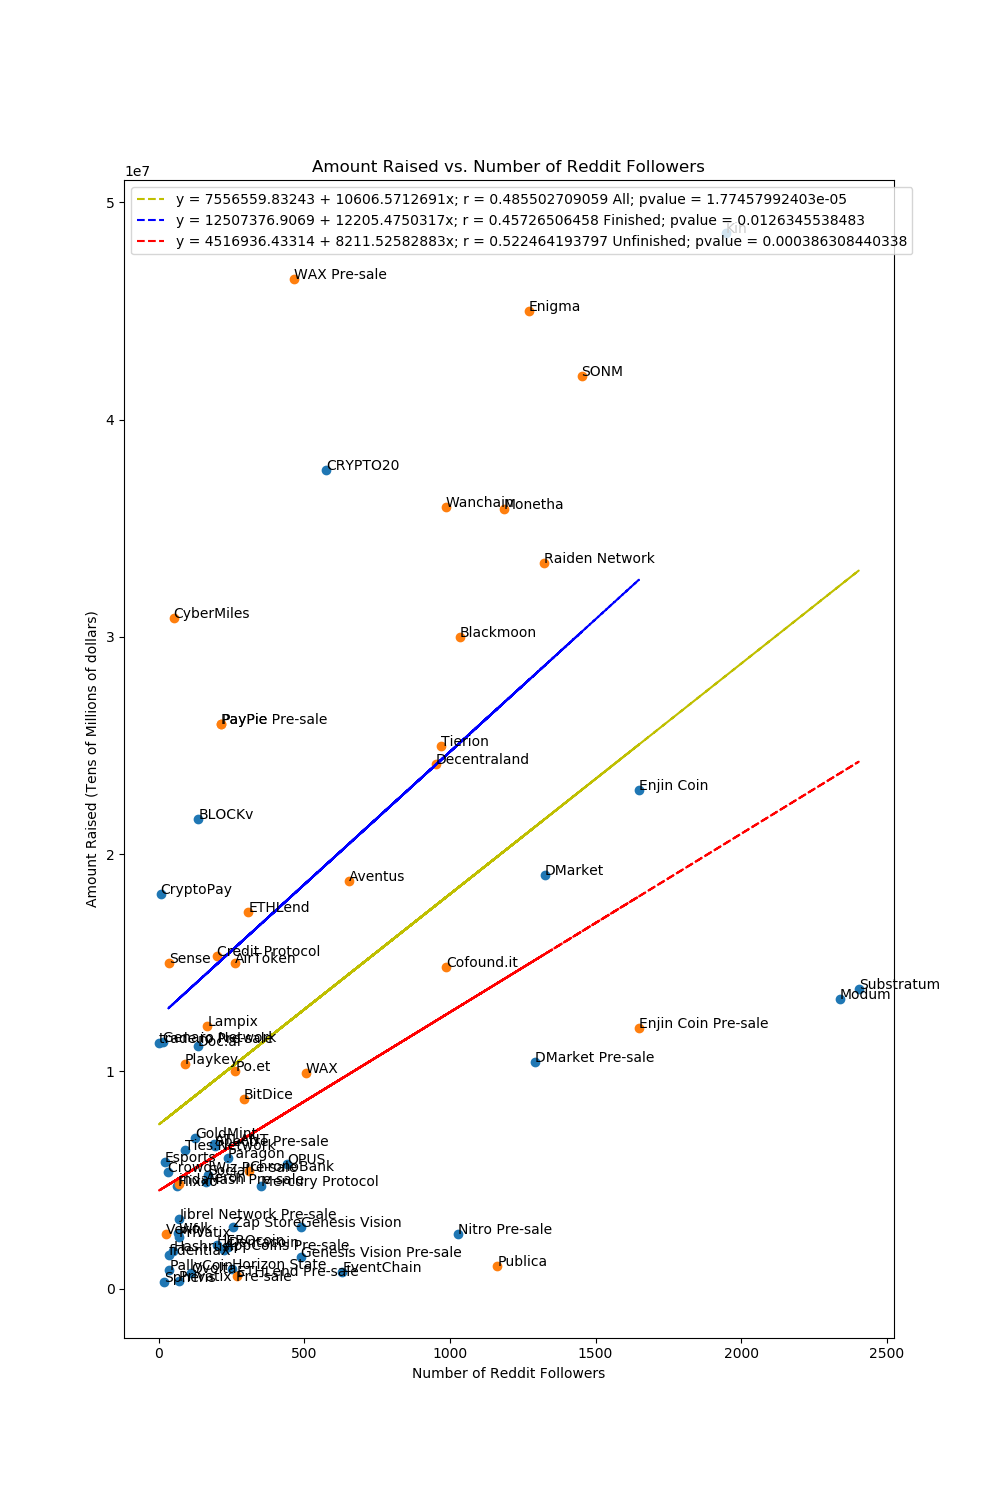

In [30]:
fig, ax = plt.subplots()
ax.scatter(unfinished_followers[1], goal_to_reach_unfinished[1])
ax.scatter(finishedr[0], finishedr[1])

fit = numpy.polyfit(total_followers[1], total_money[1], 1)
fit_func = numpy.poly1d(fit)
stats_t = ss.linregress(total_followers[1], total_money[1])
plt.plot(total_followers[1],
         fit_func(total_followers[1]),
         '--y',
         label='y = %s + %sx; r = %s' % (stats_t.intercept, stats_t.slope, stats_t.rvalue) + " All" +
               "; pvalue = " + str(stats_t.pvalue))

fit = numpy.polyfit(finishedr[0], finishedr[1], 1)
fit_func = numpy.poly1d(fit)
stats = ss.linregress(finishedr[0], finishedr[1])
plt.plot(finishedr[0],
         fit_func(finishedr[0]),
         "--b",
         label='y = %s + %sx; r = %s' % (stats.intercept, stats.slope, stats.rvalue) + " Finished" +
               "; pvalue = " + str(stats.pvalue))

fit = numpy.polyfit(unfinished_followers[1], goal_to_reach_unfinished[1], 1)
fit_func = numpy.poly1d(fit)
stats = ss.linregress(unfinished_followers[1], goal_to_reach_unfinished[1])
plt.plot(unfinished_followers[1],
         fit_func(unfinished_followers[1]),
         "--r",
         label='y = %s + %sx; r = %s' % (stats.intercept, stats.slope, stats.rvalue) + " Unfinished" +
               "; pvalue = " + str(stats.pvalue))

for i, txt in enumerate(ICO_names[1]):
    ax.annotate(txt, (unfinished_followers[1][i], goal_to_reach_unfinished[1][i]))

for i, txt in enumerate(finishedr[2]):
    ax.annotate(txt, (finishedr[0][i], finishedr[1][i]))

ax.set_xlabel("Number of Reddit Followers")
ax.set_ylabel("Amount Raised (Tens of Millions of dollars)")
ax.set_title("Amount Raised vs. Number of Reddit Followers")
plt.legend(loc="upper left")
plt.show()

In [6]:
stats_t = ss.linregress(total_followers[1], total_money[1])
while True:
    try:
        x = int(input("Number of Reddit Followers: "))
        print("Expected amount of funds raised based on Reddit followers alone: %s" % 
                 (numpy.asscalar(stats_t.intercept) + numpy.asscalar(stats_t.slope) * x))
        break
    except ValueError:
        print("Improper Input, Try Again")

Number of Reddit Followers: 5000
Expected amount of funds raised based on Reddit followers alone: 60024399.29317422


<IPython.core.display.Javascript object>


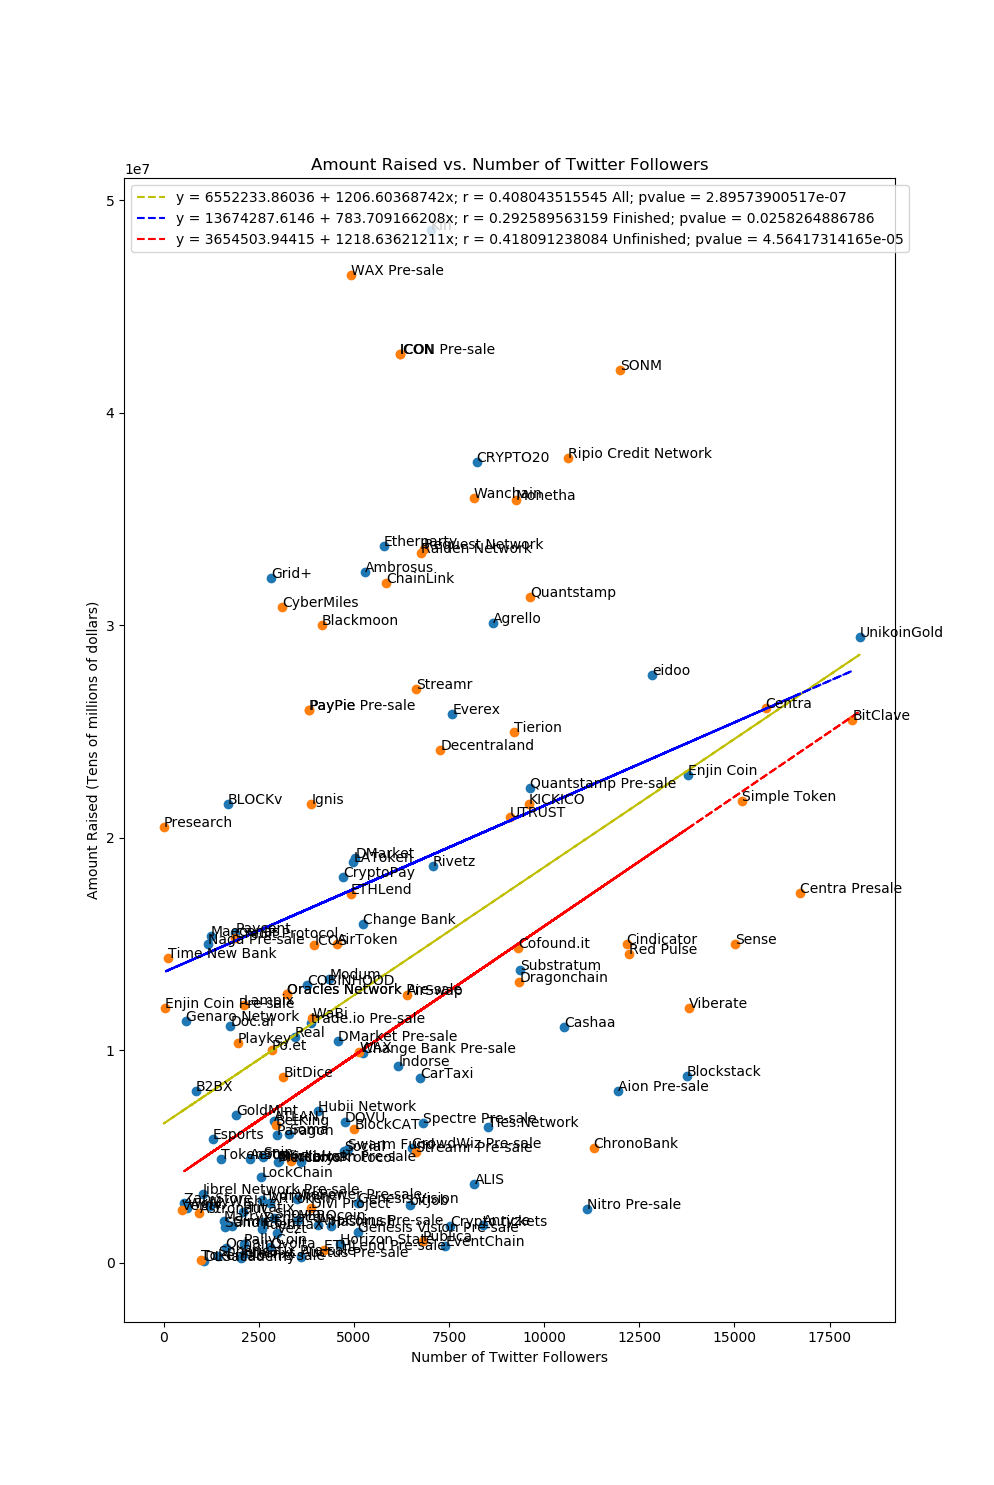

In [31]:
fig, ax = plt.subplots()
ax.scatter(unfinished_followers[2], goal_to_reach_unfinished[2])
ax.scatter(finishedt[0], finishedt[1])

fit = numpy.polyfit(total_followers[2], total_money[2], 1)
fit_func = numpy.poly1d(fit)
stats_t = ss.linregress(total_followers[2], total_money[2])
plt.plot(total_followers[2],
         fit_func(total_followers[2]),
         '--y',
         label='y = %s + %sx; r = %s' % (stats_t.intercept, stats_t.slope, stats_t.rvalue) + " All" +
               "; pvalue = " + str(stats_t.pvalue))

fit = numpy.polyfit(finishedt[0], finishedt[1], 1)
fit_func = numpy.poly1d(fit)
stats = ss.linregress(finishedt[0], finishedt[1])
plt.plot(finishedt[0],
         fit_func(finishedt[0]),
         "--b",
         label='y = %s + %sx; r = %s' % (stats.intercept, stats.slope, stats.rvalue) + " Finished" +
               "; pvalue = " + str(stats.pvalue))

fit = numpy.polyfit(unfinished_followers[2], goal_to_reach_unfinished[2], 1)
fit_func = numpy.poly1d(fit)
stats = ss.linregress(unfinished_followers[2], goal_to_reach_unfinished[2])
plt.plot(unfinished_followers[2],
         fit_func(unfinished_followers[2]),
         "--r",
         label='y = %s + %sx; r = %s' % (stats.intercept, stats.slope, stats.rvalue) + " Unfinished" +
               "; pvalue = " + str(stats.pvalue))

for i, txt in enumerate(ICO_names[2]):
    ax.annotate(txt, (unfinished_followers[2][i], goal_to_reach_unfinished[2][i]))

for i, txt in enumerate(finishedt[2]):
    ax.annotate(txt, (finishedt[0][i], finishedt[1][i]))

ax.set_xlabel("Number of Twitter Followers")
ax.set_ylabel("Amount Raised (Tens of millions of dollars)")
ax.set_title("Amount Raised vs. Number of Twitter Followers")
plt.legend(loc="upper left")
plt.show()

In [5]:
stats_t = ss.linregress(total_followers[2], total_money[2])
while True:
    try:
        x = int(input("Number of Twitter Followers: "))
        print("Expected amount of funds raised based on Twitter followers alone: %s" % 
                 (numpy.asscalar(stats_t.intercept) + numpy.asscalar(stats_t.slope) * x))
        break
    except ValueError:
        print("Improper Input, Try Again")

Number of Twitter Followers: 2000
Expected amount of funds raised based on Twitter followers alone: 9276201.32676164


<IPython.core.display.Javascript object>


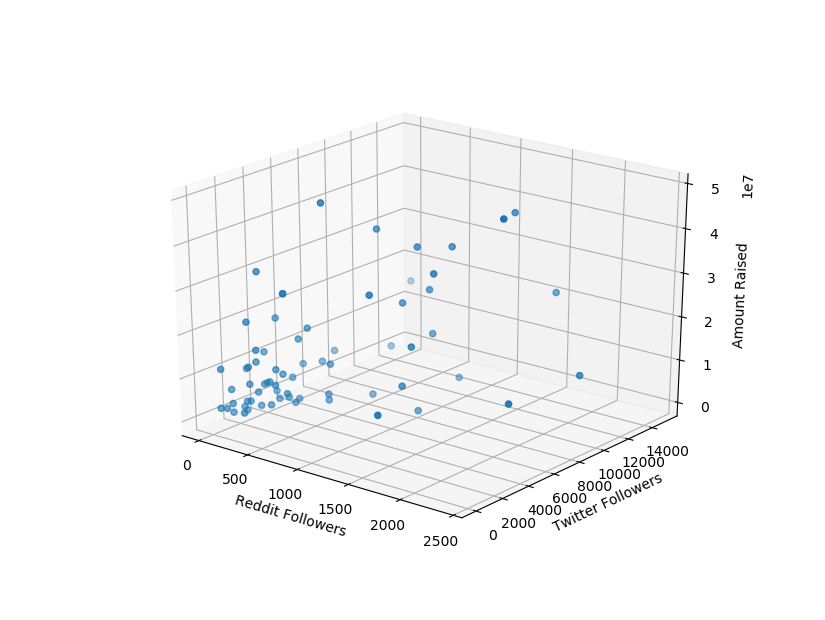

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RandT[1], RandT[2], RandT_raised, marker='o')
ax.set_xlabel("Reddit Followers")
ax.set_ylabel("Twitter Followers")
ax.set_zlabel("Amount Raised")

plt.show()


Reddit Mean: 488.514705882
Reddit Standard Deviation: 584.502566105
Twitter Mean: 4739.30882353
Twitter Standard Deviation: 3263.76857805

12417669.3601 + 4457018.14702 * (Reddit Followers) + 2627269.09116 * (Twitter Followers) = Expected amount of money raised
2111 Iterations with Batch Gradient Descent


<IPython.core.display.Javascript object>


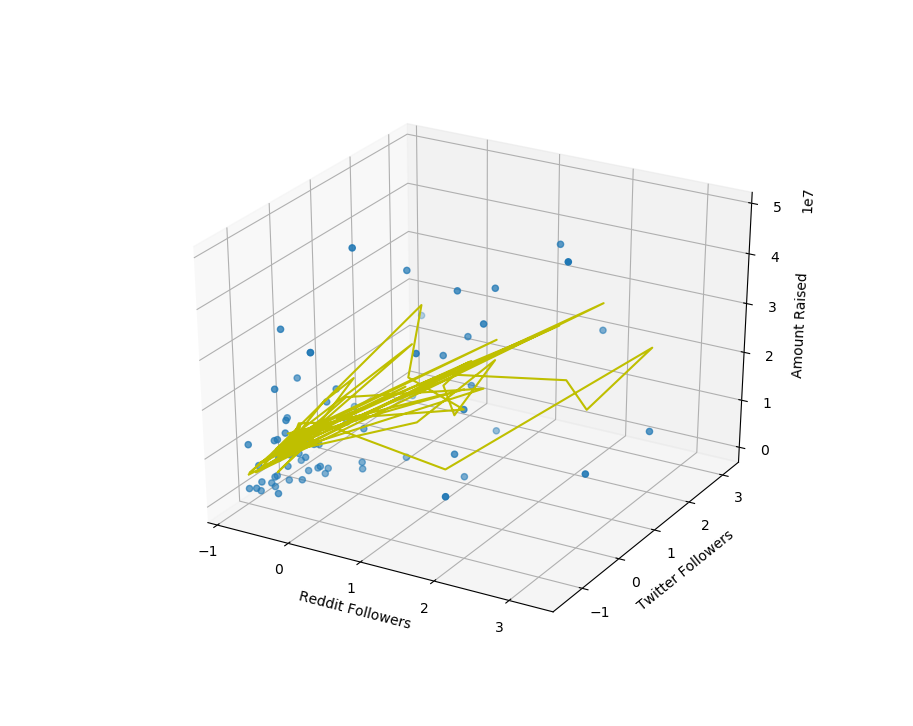

In [10]:
feature_standardization = [[], 
                           [numpy.mean(RandT[1]), numpy.std(RandT[1])], 
                           [numpy.mean(RandT[2]), numpy.std(RandT[2])]]

print("Reddit Mean: " + str(feature_standardization[1][0]))
print("Reddit Standard Deviation: " + (str(feature_standardization[1][1])))
print("Twitter Mean: " + str(feature_standardization[2][0]))
print("Twitter Standard Deviation: " + str(feature_standardization[2][1]) + "\n")

cost_coefficients = [0, 0, 0]
cost_coefficients_pend = [10, 10, 10]
step_amount = 0.01

for x in range(1, len(RandT)):
    for y in range(len(RandT[x])):
        RandT[x][y] = (RandT[x][y] - feature_standardization[x][0])/feature_standardization[x][1]
    
counter = 0
step_length_prev = 0
step_length = 10
while abs(step_length - step_length_prev) > 1:
    
    step_length_prev = numpy.power(numpy.subtract(numpy.dot(cost_coefficients, RandT), RandT_raised), 2).sum() / (2 * len(RandT[0]))
    error = numpy.subtract(numpy.dot(cost_coefficients, RandT), RandT_raised)
    temp_matrix = numpy.zeros(len(RandT[0]))
    
    for x in range(len(RandT)):
        
        temp_matrix = error * RandT[x]
        #print(temp_matrix)
        update = temp_matrix.sum() / len(RandT[0])
        #print(update)
        cost_coefficients[x] = cost_coefficients[x] - update * step_amount

    step_length = numpy.power(numpy.subtract(numpy.dot(cost_coefficients, RandT), RandT_raised), 2).sum() / (2 * len(RandT[0]))
    counter += 1
    
print(str(cost_coefficients[0]) + " + " + str(cost_coefficients[1]) + " * (Reddit Followers)" + " + " + str(cost_coefficients[2]) + " * (Twitter Followers)" + " = Expected amount of money raised")
print(str(counter) + " Iterations with Batch Gradient Descent")


# Plot Data and Equation derived from Gradient Descent

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RandT[1], RandT[2], RandT_raised, marker='o')
ax.set_xlabel("Reddit Followers")
ax.set_ylabel("Twitter Followers")
ax.set_zlabel("Amount Raised")

pred = []
for x in range(len(RandT[0])):
    pred.append(cost_coefficients[0] + cost_coefficients[1] * RandT[1][x] + cost_coefficients[2] * RandT[2][x])

ax.plot(RandT[1], RandT[2], pred, "-y")
plt.show()